# Lectura de ficheros easyMoney

## commercial_activity.csv
|Variable|Explicación|
|---|---|
|*active_customer*| Indicador de actividad del cliente en nuestra aplicación
|*entry_channel*| Canal de captación del cliente
|*entry_date*| Fecha en la que realizó la primera contratación a través de easyMoney
|*segment*| Segmento comercial del cliente
|*pk_cid*| Identificador de cliente
|*pk_partition*| Fecha de ingesta de los datos

## sociodemographic.csv
|Variable|Explicación|
|---|---|
|*age*| Edad del cliente
|*country_id*| País de residencia del cliente
|*deceased*| Fallecido. N/S
|*gender*| Sexo del cliente
|*region_code*| Provincia de residencia del cliente (para ES)
|*salary*| Ingresos brutos de la unidad familiar

## products.csv
|Variable|Explicación|
|---|---|
|*credit_card*| Tarjetas de crédito
|*debit_card*| Tarjetas de débito
|*em_account_p*| Cuenta easyMoney+
|*em_account_pp*| Cuenta easyMoney++
|*em_acount*| Cuenta easyMoney
|*emc_account*| Cuenta easyMoney Crypto
|*funds*| Fondos de inversión
|*loans*| Préstamos
|*long_term_deposit*| Depósitos a largo plazo
|*mortgage*| Mortgage
|*payroll*| Domiciliaciones
|*payroll_account*| Cuenta bonificada por domiciliaciones
|*pension_plan*| Plan de pensiones
|*securities*| Valores
|*short_term_deposit*| Short-term deposits



## import Libraries

In [60]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns

sns.set_palette("Spectral")



pd.options.display.float_format = '{:,.2f}'.format

TypeError: set_palette() got an unexpected keyword argument 'as_cmap'

### Funcion para crear tabal de informacion de df

In [2]:
def build_my_info_table(df):
    # Seleccionar las columnas numéricas del DataFrame
    numerical_columns = df.select_dtypes(include=[np.number])
    
    # Crear un DataFrame con información detallada sobre las columnas
    df_info = pd.DataFrame({
        # Nombre de la columna
        'column':   [col             for col in df.columns],
        # Tipo de datos de la columna
        'dtype':    [df[col].dtype   for col in df.columns],
        # Número de valores no nulos en la columna
        'count':    [df[col].count() for col in df.columns],
        
        # Estadísticas descriptivas para columnas numéricas
        'mean':     [round(df[col].mean(), 1)         if col in numerical_columns else '' for col in df.columns],
        'std':      [round(df[col].std(), 1)          if col in numerical_columns else '' for col in df.columns],
        'min':      [round(df[col].min(), 1)          if col in numerical_columns else '' for col in df.columns],
        '25%':      [round(df[col].quantile(0.25), 1) if col in numerical_columns else '' for col in df.columns],
        '50%':      [round(df[col].median(), 1)       if col in numerical_columns else '' for col in df.columns],
        '75%':      [round(df[col].quantile(0.75), 1) if col in numerical_columns else '' for col in df.columns],
        'max':      [round(df[col].max(), 1)          if col in numerical_columns else '' for col in df.columns],
        
        # Número de valores únicos en la columna
        'nunique':  [df[col].nunique()                                          for col in df.columns],
        
        # Lista de valores únicos si el número de valores únicos es menor que 30, de lo contrario, cadena vacía
        'unique':   [list(df[col].unique()) if df[col].nunique() < 30 else ''   for col in df.columns],
        
        # Porcentaje de cardinalidad (número de valores únicos)
        'cardinality %': [round(df[col].nunique() / df.shape[0] * 100, 1)      for col in df.columns],
        
        # Moda (valor más frecuente) en la columna
        'mode':     [df[col].mode()[0]                                          for col in df.columns],
        
        # Porcentaje de ocurrencias de la moda en la columna
        'mode %':   [round(df[col].value_counts().max() * 100 / df.shape[0], 1) for col in df.columns],
        
        # Número de valores nulos en la columna
        'null_count': [df[col].isnull().sum() for col in df.columns],
        
        # Porcentaje de valores nulos en la columna
        'null %':   [round(df[col].isnull().mean() * 100, 1)                    for col in df.columns],
    })
    return df_info


In [3]:
df_c = pd.read_csv(r"C:\Users\Usuario\Desktop\Nuclio\TFM\easyMoney_fintech\data\commercial_activity_df.csv")

In [4]:
df_p = pd.read_csv(r"C:\Users\Usuario\Desktop\Nuclio\TFM\easyMoney_fintech\data\products_df.csv")

In [5]:
df_s = pd.read_csv(r"C:\Users\Usuario\Desktop\Nuclio\TFM\easyMoney_fintech\data\sociodemographic_df.csv")

In [6]:
df_c

,Unnamed: 0,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,0,1375586,2018-01-28,2018-01-12,KHL,1.00,02 - PARTICULARES
1,1,1050611,2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
2,2,1050612,2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
3,3,1050613,2018-01-28,2015-08-10,KHD,0.00,03 - UNIVERSITARIO
4,4,1050614,2018-01-28,2015-08-10,KHE,1.00,03 - UNIVERSITARIO
...,...,...,...,...,...,...,...
5962919,13647304,1166765,2019-05-28,2016-08-14,KHE,0.00,03 - UNIVERSITARIO
5962920,13647305,1166764,2019-05-28,2016-08-14,KHE,0.00,03 - UNIVERSITARIO
5962921,13647306,1166763,2019-05-28,2016-08-14,KHE,1.00,02 - PARTICULARES
5962922,13647307,1166789,2019-05-28,2016-08-14,KHE,0.00,03 - UNIVERSITARIO


In [7]:
df_p

,Unnamed: 0,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
1,1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
2,2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
3,3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
4,4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962919,13647304,1166765,2019-05-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
5962920,13647305,1166764,2019-05-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
5962921,13647306,1166763,2019-05-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
5962922,13647307,1166789,2019-05-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1


In [8]:
df_s

,Unnamed: 0,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,0,1375586,2018-01-28,ES,29.00,H,35,N,"87,218.10"
1,1,1050611,2018-01-28,ES,13.00,V,23,N,"35,548.74"
2,2,1050612,2018-01-28,ES,13.00,V,23,N,"122,179.11"
3,3,1050613,2018-01-28,ES,50.00,H,22,N,"119,775.54"
4,4,1050614,2018-01-28,ES,50.00,V,23,N,NaN
...,...,...,...,...,...,...,...,...,...
5962919,13647304,1166765,2019-05-28,ES,50.00,V,22,N,"43,912.17"
5962920,13647305,1166764,2019-05-28,ES,26.00,V,23,N,"23,334.99"
5962921,13647306,1166763,2019-05-28,ES,50.00,H,47,N,NaN
5962922,13647307,1166789,2019-05-28,ES,50.00,H,22,N,"199,592.82"


Como se puede comprobar, a la hora de cargar el csv, se carga una columna "Unnamed:0", de la que no tengo informacion sobre lo que es. Puedo deducir que es una columna que viene como indice en el csv original, en principio como no tiene ninguna informacion relevante y ademas es diferente al indice generado por pandas( parece que hay alguna filas que salta de numero sin razon aparente) decido eliminarla ya que como identificador de cliente tengo "pk_cid".

In [9]:
df_p.drop('Unnamed: 0', axis=1, inplace=True)
df_c.drop('Unnamed: 0', axis=1, inplace=True)
df_s.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
# Elimino espacios de los nombres de las columnas y los paso a minusculas
df_s.columns = df_s.columns.str.replace(' ', '').str.lower()
df_c.columns = df_c.columns.str.replace(' ', '').str.lower()
df_p.columns = df_p.columns.str.replace(' ', '').str.lower()

## Primer análisis de la tabla "commercial_activity_df.csv"

In [11]:
df_c

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,2018-01-12,KHL,1.00,02 - PARTICULARES
1,1050611,2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
2,1050612,2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
3,1050613,2018-01-28,2015-08-10,KHD,0.00,03 - UNIVERSITARIO
4,1050614,2018-01-28,2015-08-10,KHE,1.00,03 - UNIVERSITARIO
...,...,...,...,...,...,...
5962919,1166765,2019-05-28,2016-08-14,KHE,0.00,03 - UNIVERSITARIO
5962920,1166764,2019-05-28,2016-08-14,KHE,0.00,03 - UNIVERSITARIO
5962921,1166763,2019-05-28,2016-08-14,KHE,1.00,02 - PARTICULARES
5962922,1166789,2019-05-28,2016-08-14,KHE,0.00,03 - UNIVERSITARIO


In [81]:
# Crear tabla de info.
df_c_info = build_my_info_table(df_c)

# Aplicar el estilo de gradiente de color.
styled_df_c = df_c_info.style.background_gradient(cmap='Reds', axis=0)

# Agregar estilos para hacer la tabla scrolleable y fijar los encabezados.
styled_df_c = styled_df_c.set_table_styles(
    [{
        'selector': 'thead th',
        'props': [('position', 'sticky'), ('top', '0'), ('background-color', 'black'), ('z-index', '1')]
    }, {
        'selector': 'tbody',
        'props': [('display', 'block'), ('max-height', '400px'), ('overflow-y', 'scroll'), ('overflow-x', 'auto')]
    }, {
        'selector': 'thead, tbody tr',
        'props': [('display', 'table'), ('width', '100%'), ('table-layout', 'fixed')]
    }, {
        'selector': 'th, td',
        'props': [('word-wrap', 'break-word'), ('white-space', 'pre-wrap'), ('max-width', '150px')]
    }]
)

# Mostrar la tabla.
styled_df_c

,column,dtype,count,mean,std,min,25%,50%,75%,max,nunique,unique,cardinality %,mode,mode %,null_count,null %
0,pk_cid,object,5962924,,,,,,,,456373,,7.700000,17457,0.000000,0,0.000000
1,pk_partition,datetime64[ns],5962924,,,,,,,,17,"[Timestamp('2018-01-28 00:00:00'), Timestamp('2018-02-28 00:00:00'), Timestamp('2018-03-28 00:00:00'), Timestamp('2018-04-28 00:00:00'), Timestamp('2018-05-28 00:00:00'), Timestamp('2018-06-28 00:00:00'), Timestamp('2018-07-28 00:00:00'), Timestamp('2018-08-28 00:00:00'), Timestamp('2018-09-28 00:00:00'), Timestamp('2018-10-28 00:00:00'), Timestamp('2018-11-28 00:00:00'), Timestamp('2018-12-28 00:00:00'), Timestamp('2019-01-28 00:00:00'), Timestamp('2019-02-28 00:00:00'), Timestamp('2019-03-28 00:00:00'), Timestamp('2019-04-28 00:00:00'), Timestamp('2019-05-28 00:00:00')]",0.000000,2019-05-28 00:00:00,7.400000,0,0.000000
2,entry_date,datetime64[ns],5956511,,,,,,,,1497,,0.000000,2017-07-28 00:00:00,1.000000,6413,0.100000
3,entry_channel,object,5829891,,,,,,,,68,,0.000000,KHE,52.200000,133033,2.200000
4,active_customer,int64,5962924,0.400000,0.500000,0,0.000000,0.000000,1.000000,1,2,"[1, 0]",0.000000,0,59.700000,0,0.000000
5,segment,object,5828980,,,,,,,,3,"['02 - PARTICULARES', '03 - UNIVERSITARIO', '01 - TOP', nan]",0.000000,03 - UNIVERSITARIO,65.400000,133944,2.200000


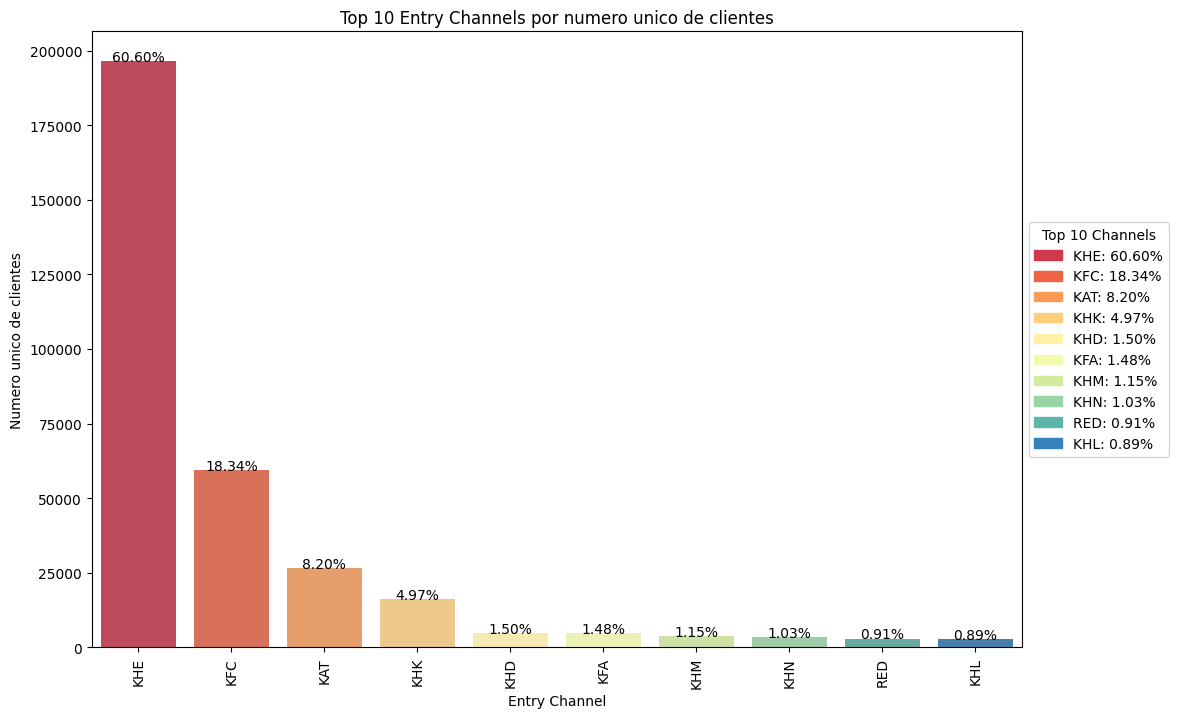

In [41]:
# Filtrar para obtener la primera observación de cada cliente
df_filtered = df_c.drop_duplicates(subset='pk_cid', keep='first')

# Contar el número de clientes únicos por canal de entrada
channel_counts = df_filtered['entry_channel'].value_counts().reset_index()
channel_counts.columns = ['entry_channel', 'num_customers']

# Calcular el porcentaje de cada canal
total_customers = channel_counts['num_customers'].sum()
channel_counts['percentage'] = (channel_counts['num_customers'] / total_customers) * 100

# Filtrar para obtener solo el top 10
top_10_channels = channel_counts.head(10)

# Crear un gráfico de barras con el Top 10
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='entry_channel', y='num_customers', hue='entry_channel', data=top_10_channels, palette='Spectral')

# Añadir etiquetas con los porcentajes encima de cada barra
for index, row in top_10_channels.iterrows():
    ax.text(index, row['num_customers'], f"{row['percentage']:.2f}%", color='black', ha="center")

# Añadir etiquetas y título
plt.xlabel('Entry Channel')
plt.ylabel('Numero unico de clientes')
plt.title('Top 10 Entry Channels por numero unico de clientes')

# Añadir la leyenda al lado del gráfico
handles = [plt.Rectangle((0,0),1,1, color=sns.color_palette('Spectral', n_colors=10)[i]) for i in range(10)]
labels = [f"{row['entry_channel']}: {row['percentage']:.2f}%" for index, row in top_10_channels.iterrows()]
plt.legend(handles, labels, title='Top 10 Channels', loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=90)
plt.show()


In [18]:
df_c['entry_channel'].unique()

array(['KHL', 'KHE', 'KHD', 'KFA', 'KFC', 'KAT', 'KAZ', 'RED', 'KHC',
       'KHK', 'KGN', 'KHM', 'KHO', 'KDH', 'KEH', 'KAD', 'KBG', nan, 'KGC',
       'KHF', 'KFK', 'KHN', 'KAB', 'KAG', 'KAA', 'KGX', 'KAR', 'KAK',
       'KBZ', '007', 'KBO', 'KCB', '013', 'KAY', 'KBE', 'KAS', 'KCL',
       '004', 'KAF', 'KCC', 'KEY', 'KDT', 'KAQ', 'KAH', 'KAM', 'KAJ',
       'KFD', 'KCH', 'KFS', 'KAW', 'KAE', 'KBH', 'KDR', 'KHQ', 'KBW',
       'KBY', 'KCI', 'KEJ', 'KFF', 'KBU', 'KAI', 'KCK', 'KDA', 'KES',
       'KHP', 'KFL', 'KDS', 'KFP', 'KHS'], dtype=object)

Como podemos comprobar, la variable 'entry_channel' tiene muchos valores unicos, a priori no sabemos que significan, estamos a la espera de obtener la documentacion de la empresa para saber que significa cada siglas de cada valor. Aun asi en este caso vemos que hay muy poca representacion de algunos canales de entrada y un 2% de nulos, bajo mi criterio creo que deberiamos agrupar los valores con menos de un 2% de representacion y los valores unicos en una conjunto 'otros'

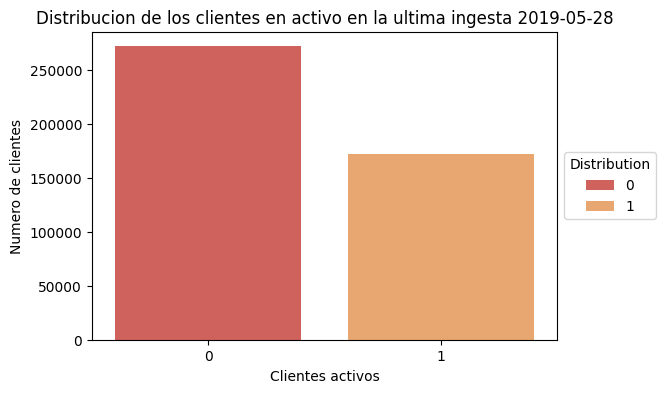

In [95]:

# Filtrar el DataFrame para obtener solo los datos de la última ingesta
latest_date = '2019-05-28'
df_filtered = df_c[df_c['pk_partition'] == latest_date]

# Contar la distribución de valores en 'active_customer'
count_data = df_filtered['active_customer'].value_counts().reset_index()
count_data.columns = ['active_customer', 'count']

# Calcular el porcentaje de cada valor
total_count = count_data['count'].sum()
count_data['percentage'] = (count_data['count'] / total_count) * 100

# Crear el gráfico de barras para la distribución de active_customer
plt.figure(figsize=(6, 4))
barplot = sns.barplot(x='active_customer', y='count', hue='active_customer', data=count_data)

# Añadir etiquetas y título
plt.xlabel('Clientes activos')
plt.ylabel('Numero de clientes')
plt.title('Distribucion de los clientes en activo en la ultima ingesta 2019-05-28')


plt.legend(title='Distribution', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=0)
plt.show()



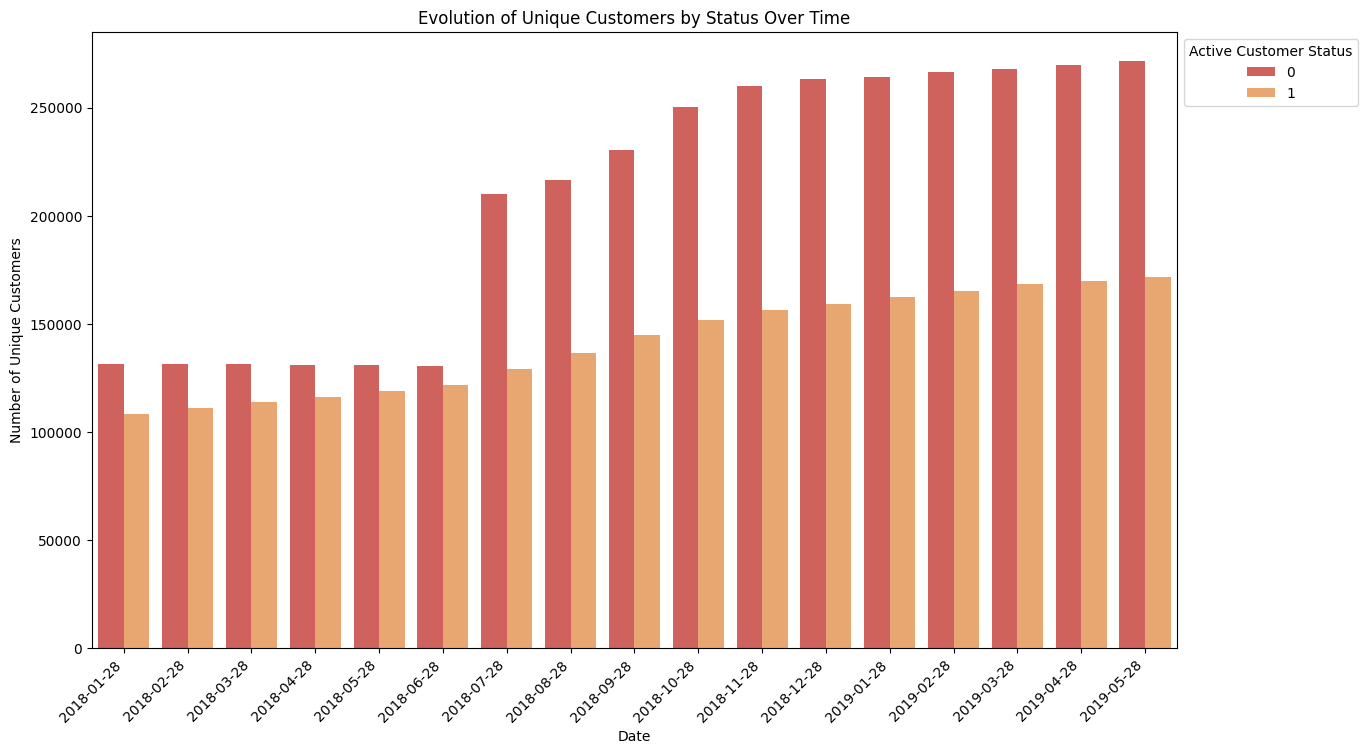

In [85]:
# Agrupar por fecha de ingesta y estado del cliente
df_grouped = df_c.groupby(['pk_partition', 'active_customer'])['pk_cid'].nunique().reset_index()
df_grouped.columns = ['date', 'active_customer', 'num_customers']

# Crear el gráfico de barras para la evolución de clientes
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='date', y='num_customers', hue='active_customer', data=df_grouped)

# Añadir etiquetas y título
plt.xlabel('Date')
plt.ylabel('Number of Unique Customers')
plt.title('Evolution of Unique Customers by Status Over Time')

# Ajustar el formato de fecha en el eje X
plt.xticks(rotation=45, ha='right')

# Añadir leyenda
plt.legend(title='Active Customer Status', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

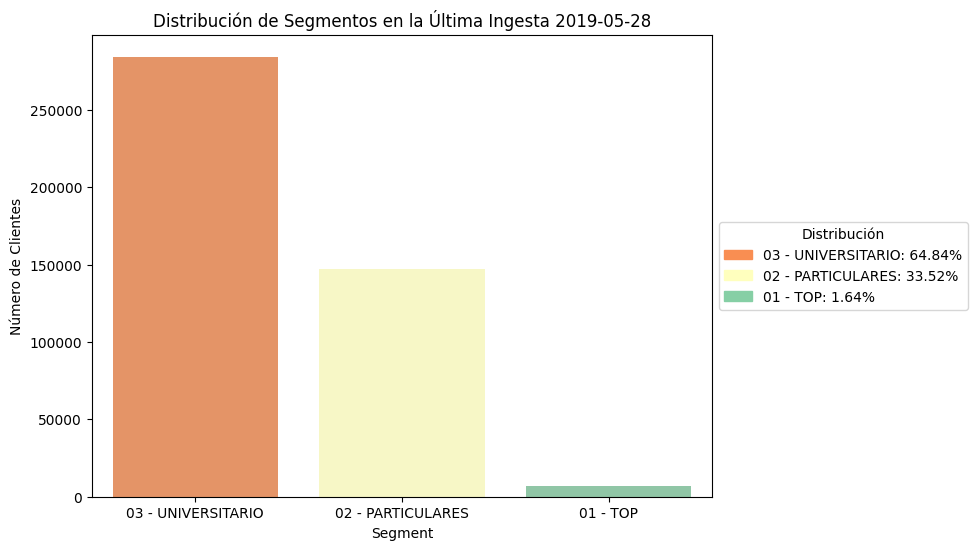

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Filtrar para obtener la última ingesta de cada pk_cid
latest_date = '2019-05-28'
df_latest = df_c[df_c['pk_partition'] == latest_date]

# Obtener la última observación para cada pk_cid
df_last_observation = df_latest.drop_duplicates(subset='pk_cid', keep='last')

# Contar la distribución de valores en 'segment'
segment_counts = df_last_observation['segment'].value_counts().reset_index()
segment_counts.columns = ['segment', 'count']

# Calcular el porcentaje de cada valor
total_segments = segment_counts['count'].sum()
segment_counts['percentage'] = (segment_counts['count'] / total_segments) * 100

# Crear la paleta de colores
palette = sns.color_palette('Spectral', n_colors=len(segment_counts))

# Crear el gráfico de barras para la distribución de segment
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='segment', y='count',hue='segment', data=segment_counts, palette=palette)

# Añadir etiquetas y título
plt.xlabel('Segment')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Segmentos en la Última Ingesta 2019-05-28')

# Crear la leyenda con porcentaje
handles = [mpatches.Patch(color=palette[i], label=f"{segment_counts['segment'].iloc[i]}: {segment_counts['percentage'].iloc[i]:.2f}%") for i in range(len(segment_counts))]
plt.legend(handles=handles, title='Distribución', loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=0,)
plt.show()


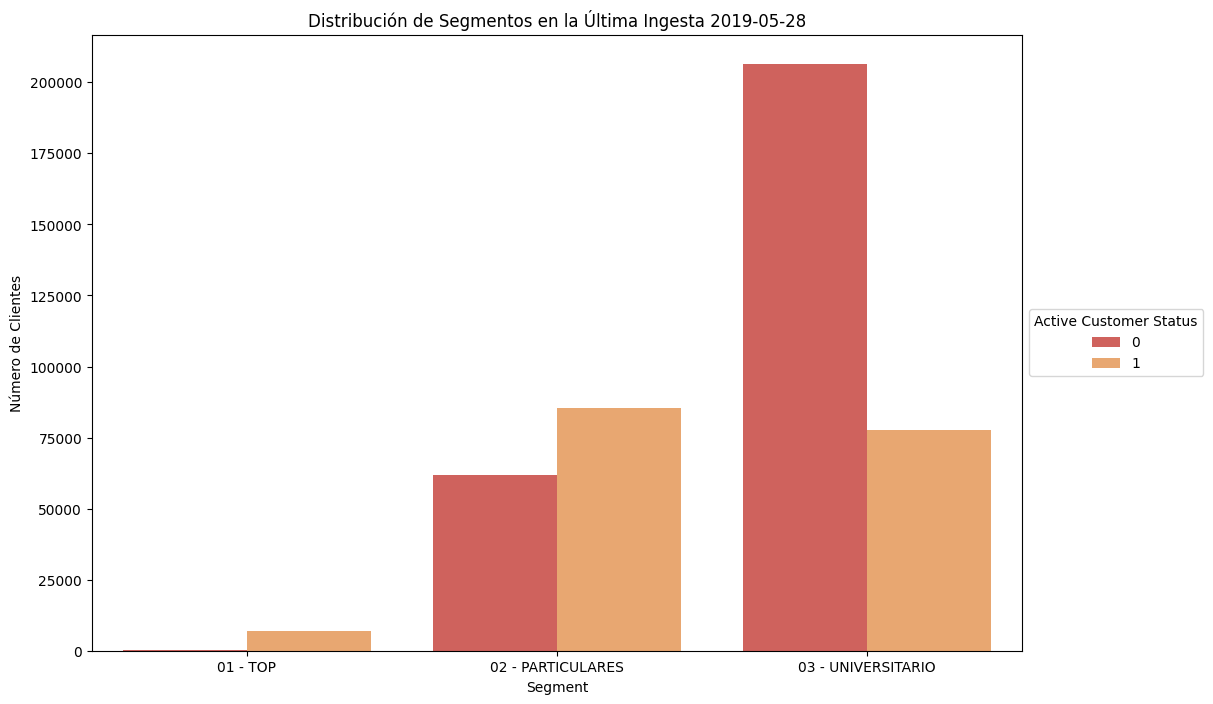

In [107]:


# Filtrar para obtener la última ingesta de cada pk_cid
latest_date = '2019-05-28'
df_latest = df_c[df_c['pk_partition'] == latest_date]

# Obtener la última observación para cada pk_cid
df_last_observation = df_latest.drop_duplicates(subset='pk_cid', keep='last')

# Contar la distribución de valores en 'segment' y 'active_customer'
segment_counts = df_last_observation.groupby(['segment', 'active_customer']).size().reset_index(name='count')


# Crear el gráfico de barras apiladas para la distribución de segment
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='segment', y='count', hue='active_customer', data=segment_counts)

# Añadir etiquetas y título
plt.xlabel('Segment')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Segmentos en la Última Ingesta 2019-05-28')


plt.legend( title='Active Customer Status', loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=0)
plt.show()


In [82]:
df_c

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,2018-01-12,KHL,1,02 - PARTICULARES
1,1050611,2018-01-28,2015-08-10,KHE,0,03 - UNIVERSITARIO
2,1050612,2018-01-28,2015-08-10,KHE,0,03 - UNIVERSITARIO
3,1050613,2018-01-28,2015-08-10,KHD,0,03 - UNIVERSITARIO
4,1050614,2018-01-28,2015-08-10,KHE,1,03 - UNIVERSITARIO
...,...,...,...,...,...,...
5962919,1166765,2019-05-28,2016-08-14,KHE,0,03 - UNIVERSITARIO
5962920,1166764,2019-05-28,2016-08-14,KHE,0,03 - UNIVERSITARIO
5962921,1166763,2019-05-28,2016-08-14,KHE,1,02 - PARTICULARES
5962922,1166789,2019-05-28,2016-08-14,KHE,0,03 - UNIVERSITARIO


In [16]:
df_c.shape

(5962924, 6)

In [15]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           object        
 1   pk_partition     datetime64[ns]
 2   entry_date       datetime64[ns]
 3   entry_channel    object        
 4   active_customer  int64         
 5   segment          object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 273.0+ MB


In [14]:
df_c["active_customer"].value_counts()

active_customer
0    3557573
1    2405351
Name: count, dtype: int64

Viendo los tipos de variables que asigno pandas veo varios tipos que voy a cambiar.

"pk_cid" es un identificador de cliente en principio unico, lo comprobare mas adelante, no necesito que sea tipo numerico lo pasare a object.

"pk_partition" es una fecha asi que la convertire a tipo fecha.

"entry_date" es una fecha asi que la convertire a tipo fecha.

"active_consumer" solo tiene 0 y 1 como valores asi que lo cambio a tipo int.

In [13]:
# Cambiar el tipo de dato de las columnas

df_c['pk_cid'] = df_c['pk_cid'].astype('object')
df_c['pk_partition'] = pd.to_datetime(df_c['pk_partition'], format='%Y-%m-%d')
df_c['entry_date'] = pd.to_datetime(df_c['entry_date'], format='%Y-%m-%d', errors='coerce')
df_c['active_customer'] = df_c['active_customer'].astype('int64')


In [38]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           object        
 1   pk_partition     datetime64[ns]
 2   entry_date       datetime64[ns]
 3   entry_channel    object        
 4   active_customer  int64         
 5   segment          object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 273.0+ MB


In [25]:
df_c.isna().sum()

pk_cid                  0
pk_partition            0
entry_date           6413
entry_channel      133033
active_customer         0
segment            133944
dtype: int64

In [26]:
df_c['pk_partition'].value_counts()

pk_partition
2019-05-28    442995
2019-04-28    439627
2019-03-28    436183
2019-02-28    431727
2019-01-28    426875
2018-12-28    422481
2018-11-28    416387
2018-10-28    402300
2018-09-28    375323
2018-08-28    352922
2018-07-28    339339
2018-06-28    252104
2018-05-28    249926
2018-04-28    247463
2018-03-28    245258
2018-02-28    242521
2018-01-28    239493
Name: count, dtype: int64

Por lo que podemos comporbar en un primer vistazo es que cada ingesta de datos de datos, se incrementa el numero de visualizaciones. Y podemos suponer que en este caso es el numero de clientes el que se incrementa al mes, teniendo datos de 239493 clientes en enero de 2018, y 442995 en la ultima ingesta de datos en mayo de 2019. A continuacion comprobare las demas tablas para corroborar esta hipótesis.

In [53]:
df_c[df_c['pk_cid'] == 1375586]

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,2018-01-12,KHL,1,02 - PARTICULARES
346322,1375586,2018-02-28,2018-01-12,KHL,1,02 - PARTICULARES
592407,1375586,2018-03-28,2018-01-12,KHL,1,02 - PARTICULARES
831104,1375586,2018-04-28,2018-01-12,KHL,1,02 - PARTICULARES
1108457,1375586,2018-05-28,2018-01-12,KHL,1,02 - PARTICULARES
1357280,1375586,2018-06-28,2018-01-12,KHL,1,02 - PARTICULARES
1791360,1375586,2018-07-28,2018-01-12,KHL,1,02 - PARTICULARES
1988936,1375586,2018-08-28,2018-01-12,KHL,0,02 - PARTICULARES
2487565,1375586,2018-09-28,2018-01-12,KHL,0,02 - PARTICULARES
2753984,1375586,2018-10-28,2018-01-12,KHL,0,02 - PARTICULARES


Por lo que podemos comprobar en esta agrupacion con la info de un solo cliente vemos que cada mes se carga la info de dicho cliente con su informacion de ese mes.

## Primer analisis de la tabla "products_df.csv"

In [27]:
df_p.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1


In [49]:
# Crear tabla de info.
df_p_info = build_my_info_table(df_p)

# Aplicar el estilo de gradiente de color.
styled_df_p = df_p_info.style.background_gradient(cmap='Reds', axis=0)

# Agregar estilos para hacer la tabla scrolleable y fijar los encabezados.
styled_df_p = styled_df_p.set_table_styles(
    [{
        'selector': 'thead th',
        'props': [('position', 'sticky'), ('top', '0'), ('background-color', 'black'), ('z-index', '1')]
    }, {
        'selector': 'tbody',
        'props': [('display', 'block'), ('max-height', '400px'), ('overflow-y', 'scroll'), ('overflow-x', 'auto')]
    }, {
        'selector': 'thead, tbody tr',
        'props': [('display', 'table'), ('width', '100%'), ('table-layout', 'fixed')]
    }, {
        'selector': 'th, td',
        'props': [('word-wrap', 'break-word'), ('white-space', 'pre-wrap'), ('max-width', '150px')]
    }]
)

# Mostrar la tabla.
styled_df_p

,column,dtype,count,mean,std,min,25%,50%,75%,max,nunique,unique,cardinality %,mode,mode %,null_count,null %
0,pk_cid,int64,5962924,1234929.800000,162302.000000,15891,1112532.000000,1231097.000000,1352339.000000,1553689,456373,,7.700000,17457,0.000000,0,0.000000
1,pk_partition,object,5962924,,,,,,,,17,"['2018-01-28', '2018-02-28', '2018-03-28', '2018-04-28', '2018-05-28', '2018-06-28', '2018-07-28', '2018-08-28', '2018-09-28', '2018-10-28', '2018-11-28', '2018-12-28', '2019-01-28', '2019-02-28', '2019-03-28', '2019-04-28', '2019-05-28']",0.000000,2019-05-28,7.400000,0,0.000000
2,short_term_deposit,int64,5962924,0.000000,0.100000,0,0.000000,0.000000,0.000000,1,2,"[0, 1]",0.000000,0,99.700000,0,0.000000
3,loans,int64,5962924,0.000000,0.000000,0,0.000000,0.000000,0.000000,1,2,"[0, 1]",0.000000,0,100.000000,0,0.000000
4,mortgage,int64,5962924,0.000000,0.000000,0,0.000000,0.000000,0.000000,1,2,"[0, 1]",0.000000,0,100.000000,0,0.000000
5,funds,int64,5962924,0.000000,0.100000,0,0.000000,0.000000,0.000000,1,2,"[0, 1]",0.000000,0,99.700000,0,0.000000
6,securities,int64,5962924,0.000000,0.100000,0,0.000000,0.000000,0.000000,1,2,"[0, 1]",0.000000,0,99.600000,0,0.000000
7,long_term_deposit,int64,5962924,0.000000,0.100000,0,0.000000,0.000000,0.000000,1,2,"[0, 1]",0.000000,0,98.300000,0,0.000000
8,em_account_pp,int64,5962924,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,1,[0],0.000000,0,100.000000,0,0.000000
9,credit_card,int64,5962924,0.000000,0.100000,0,0.000000,0.000000,0.000000,1,2,"[0, 1]",0.000000,0,98.800000,0,0.000000


Con un vistazo rapido de la tabla de informacion de cada columna, compruebo que toda las columnas son binarias menos el id y la fecha y solo dos tienen valores nulos, que mas adelante analizare para ver como tratarlos.

In [29]:
df_p['payroll'].value_counts()

payroll
0.00    5757076
1.00     205787
Name: count, dtype: int64

In [31]:
df_p['pension_plan'].value_counts()

pension_plan
0.00    5745061
1.00     217802
Name: count, dtype: int64

Tras comprobar que las variables con tipo float solo contienen valores de 1 y 0 cambio el tipo de variable a int.

In [42]:
df_p['payroll'] = df_p['payroll'].astype('Int64')
df_p['pension_plan'] = df_p['pension_plan'].astype('Int64')

In [43]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 17 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   pk_cid              int64 
 1   pk_partition        object
 2   short_term_deposit  int64 
 3   loans               int64 
 4   mortgage            int64 
 5   funds               int64 
 6   securities          int64 
 7   long_term_deposit   int64 
 8   em_account_pp       int64 
 9   credit_card         int64 
 10  payroll             Int64 
 11  pension_plan        Int64 
 12  payroll_account     int64 
 13  emc_account         int64 
 14  debit_card          int64 
 15  em_account_p        int64 
 16  em_acount           int64 
dtypes: Int64(2), int64(14), object(1)
memory usage: 784.8+ MB


In [50]:
df_p['pk_partition'].value_counts()  


pk_partition
2019-05-28    442995
2019-04-28    439627
2019-03-28    436183
2019-02-28    431727
2019-01-28    426875
2018-12-28    422481
2018-11-28    416387
2018-10-28    402300
2018-09-28    375323
2018-08-28    352922
2018-07-28    339339
2018-06-28    252104
2018-05-28    249926
2018-04-28    247463
2018-03-28    245258
2018-02-28    242521
2018-01-28    239493
Name: count, dtype: int64

In [51]:
df_p[df_p['pk_cid'] == 1375586]

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
346322,1375586,2018-02-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
592407,1375586,2018-03-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
831104,1375586,2018-04-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1108457,1375586,2018-05-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1357280,1375586,2018-06-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1791360,1375586,2018-07-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1988936,1375586,2018-08-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2487565,1375586,2018-09-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2753984,1375586,2018-10-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Tambien compruebo, los datos del mismo cliente y veo que los indicen coinciden, tambien viendo los valores, deduzco que cunado hay un 1 en el producto ese cliente a usado y ha contratado el porducto el mes de la ingesta de datos 

### Sociodemographic

In [54]:
df_s.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pk_cid        int64  
 1   pk_partition  object 
 2   country_id    object 
 3   region_code   float64
 4   gender        object 
 5   age           int64  
 6   deceased      object 
 7   salary        float64
dtypes: float64(2), int64(2), object(4)
memory usage: 363.9+ MB


In [55]:
# Crear tabla de info.
df_s_info = build_my_info_table(df_s)

# Aplicar el estilo de gradiente de color.
styled_df_s = df_s_info.style.background_gradient(cmap='Reds', axis=0)

# Agregar estilos para hacer la tabla scrolleable y fijar los encabezados.
styled_df_s = styled_df_s.set_table_styles(
    [{
        'selector': 'thead th',
        'props': [('position', 'sticky'), ('top', '0'), ('background-color', 'black'), ('z-index', '1')]
    }, {
        'selector': 'tbody',
        'props': [('display', 'block'), ('max-height', '400px'), ('overflow-y', 'scroll'), ('overflow-x', 'auto')]
    }, {
        'selector': 'thead, tbody tr',
        'props': [('display', 'table'), ('width', '100%'), ('table-layout', 'fixed')]
    }, {
        'selector': 'th, td',
        'props': [('word-wrap', 'break-word'), ('white-space', 'pre-wrap'), ('max-width', '150px')]
    }]
)

# Mostrar la tabla.
styled_df_s

,column,dtype,count,mean,std,min,25%,50%,75%,max,nunique,unique,cardinality %,mode,mode %,null_count,null %
0,pk_cid,int64,5962924,1234929.800000,162302.000000,15891,1112532.000000,1231097.000000,1352339.000000,1553689,456373,,7.700000,17457,0.000000,0,0.000000
1,pk_partition,object,5962924,,,,,,,,17,"['2018-01-28', '2018-02-28', '2018-03-28', '2018-04-28', '2018-05-28', '2018-06-28', '2018-07-28', '2018-08-28', '2018-09-28', '2018-10-28', '2018-11-28', '2018-12-28', '2019-01-28', '2019-02-28', '2019-03-28', '2019-04-28', '2019-05-28']",0.000000,2019-05-28,7.400000,0,0.000000
2,country_id,object,5962924,,,,,,,,41,,0.000000,ES,100.000000,0,0.000000
3,region_code,float64,5960660,25.800000,13.600000,1.000000,13.000000,28.000000,36.000000,52.000000,52,,0.000000,28.000000,19.900000,2264,0.000000
4,gender,object,5962899,,,,,,,,2,"['H', 'V', nan]",0.000000,H,51.800000,25,0.000000
5,age,int64,5962924,29.800000,12.000000,2,22.000000,25.000000,34.000000,105,104,,0.000000,22,12.200000,0,0.000000
6,deceased,object,5962924,,,,,,,,2,"['N', 'S']",0.000000,N,100.000000,0,0.000000
7,salary,float64,4450821,115816.700000,199551.900000,1202.700000,61500.600000,88654.600000,131669.900000,28894395.500000,258629,,4.300000,451931.220000,0.000000,1512103,25.400000


In [56]:
df_s[df_s['pk_cid'] == 1375586]

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-28,ES,29.00,H,35,N,"87,218.10"
346322,1375586,2018-02-28,ES,29.00,H,35,N,"87,218.10"
592407,1375586,2018-03-28,ES,29.00,H,35,N,"87,218.10"
831104,1375586,2018-04-28,ES,29.00,H,35,N,"87,218.10"
1108457,1375586,2018-05-28,ES,29.00,H,35,N,"87,218.10"
1357280,1375586,2018-06-28,ES,29.00,H,35,N,"87,218.10"
1791360,1375586,2018-07-28,ES,29.00,H,35,N,"87,218.10"
1988936,1375586,2018-08-28,ES,29.00,H,36,N,"87,218.10"
2487565,1375586,2018-09-28,ES,29.00,H,36,N,"87,218.10"
2753984,1375586,2018-10-28,ES,29.00,H,36,N,"87,218.10"


Despues de analizar las tres tablas, llego a varias conclusiones:

- Las tres tablas tienen el mismo numero de filas y el mismo indice, asi que lo mas inteligente y para no tener varios dataframes, el siguiente paso sera unir los dataframes en uno solo.
- Hay columnas que tienen el mismo valor en todo sus observaciones lo mas logico sera eliminarlas, aunque es algo que tengo que hablar con el equipo.
- Los codigos de las regiones estan en numero y sera interesante crear una nueva columna o cambiarla para poder analizar los datos dependiendo de su provincia de una manera mas clara.
- Para hacer el primer vistazo general de como esta la empresa en este momento, y hacer un dashboard informativo creo que lo mas interesante seria utilizar solo los datos de la ultimna ingesta para hacer un primer analisis del estado actual de la empresa. 

In [ ]:
# Diccionario de mapeo de códigos de provincia a nombres de provincia

provincia_mapping = {
    1: "Álava",2: "Albacete",3: "Alicante",4: "Almería",5: "Ávila",6: "Badajoz",7: "Baleares, Islas",
    8: "Barcelona",9: "Burgos",10: "Cáceres",11: "Cádiz",12: "Castellón",13: "Ciudad Real",14: "Córdoba",15: "Coruña, A",
    16: "Cuenca",17: "Girona",18: "Granada",19: "Guadalajara",20: "Gipuzkoa",21: "Huelva",22: "Huesca",23: "Jaén",24: "León",
    25: "Lleida",26: "Rioja, La",27: "Lugo",28: "Madrid",29: "Málaga",30: "Murcia",31: "Navarra",32: "Ourense",33: "Asturias",
    34: "Palencia",35: "Palmas, Las",36: "Pontevedra",37: "Salamanca",38: "Santa Cruz de Tenerife",39: "Cantabria",40: "Segovia",
    41: "Sevilla",42: "Soria",43: "Tarragona",44: "Teruel",45: "Toledo",46: "Valencia",47: "Valladolid",48: "Bizkaia",49: "Zamora",
    50: "Zaragoza",51: "Ceuta",52: "Melilla"}
